### Exercise 12.1

By keeping fixed all the other parameters, try to use at least two other optimizers, different from SGD. <span style="color:red">Watch to accuracy and loss for training and validation data and comment on the performances</span>.

Utilizzando una rete neurale con 2 layer da 400 e 100 neuroni con un layer di output con 10 possibili valori , sono state eseguite 4 simulazioni con 4 ottimizzatori diversi. I valori della funzione costo per il set di dati di *training* e di *validation* dopo 5 epoche sono riportati qui sotto:
- SGD   *loss training data*=0.1536 *loss validation data*=0.1540
- Adagrad   *loss training data*= 0.05083 *loss validation data*=0.07434
- Adamax   *loss training data*=0.0355 *loss validation data*=0.0645
- Nadam   *loss training data*=0.03423 *loss validation data*=0.09003

Gli ottimizzatori più performante risultano essere Adagrad e Adamax.

Riportiamo l'andamento delle funzioni costo ottenute da ogni simulazione:
<img src="pictures/ex12_1_Adagrad.png" width="60%">
<img src="pictures/ex12_1_adamax.png" width="60%">
<img src="pictures/ex12_1_Nadam.png" width="60%">
<img src="pictures/ex12_1_SGD.png" width="60%">


In [111]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.set_random_seed(seed)

In [112]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


an example of a data point with label 4


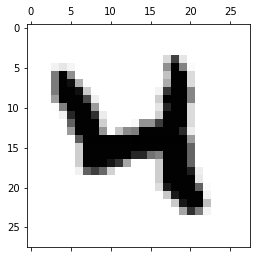

an example of a data point with label 4 before to_categorical ...
... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [113]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

print('an example of a data point with label', Y_train[20], 'before to_categorical ...')
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [115]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5 per non fare overfitting
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [116]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy, #crossentropy perche devo distinguere gli 1 dagli 0 alla fine
                  optimizer=Nadam(),
                  metrics=['accuracy']) #percentuale di volte che azzecco la cifra
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [117]:
# training parameters
batch_size = 32
epochs = 5 #suddivido tutti i dati di training in batch casuali di 32 elementi

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))
#ci impiega tanto perchè ogni epoca deve elaborare 60000 immagini 28x28

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 65s 1ms/step - loss: 0.2591 - acc: 0.9229 - val_loss: 0.1133 - val_acc: 0.9632
Epoch 2/5
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1260 - acc: 0.9645 - val_loss: 0.0995 - val_acc: 0.9706
Epoch 3/5
60000/60000 [==============================] - 56s 931us/step - loss: 0.0983 - acc: 0.9723 - val_loss: 0.0868 - val_acc: 0.9746
Epoch 4/5
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0851 - acc: 0.9752 - val_loss: 0.0965 - val_acc: 0.9746
Epoch 5/5
60000/60000 [==============================] - 57s 950us/step - loss: 0.0728 - acc: 0.9788 - val_loss: 0.0900 - val_acc: 0.9771


10000/10000 [==============================] - 2s 237us/step

Test loss: 0.09002737669394283
Test accuracy: 0.9771
60000/60000 [==============================] - 12s 197us/step

Train loss: 0.034226906250067926
Train accuracy: 0.98905


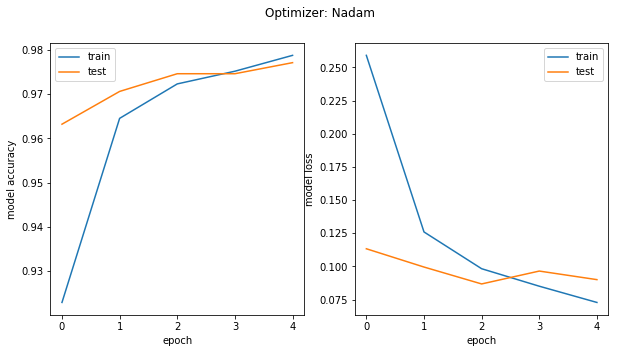

In [118]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


# evaluate model
score = model_DNN.evaluate(X_train,Y_train, verbose=1)

# print performance
print()
print('Train loss:', score[0])
print('Train accuracy:', score[1])
# look into training history

# summarize history for accuracy
fig=plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

plt.suptitle("Optimizer: Nadam")
plt.savefig("./pictures/ex12_1_Nadam.png")
plt.show()


#l'accuracy del test è più alta e la loss più bassa perche quando fa la validation spegne il dropout quindi è più performante

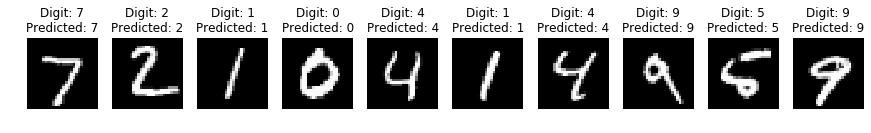

In [119]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()